In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
cardio=pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv")
cardio.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [4]:
cardio = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",delimiter = ';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
cardio.shape

(70000, 13)

In [6]:
#check the missing value
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
#check how many duplicates
cardio.duplicated().sum()

0

<Axes: >

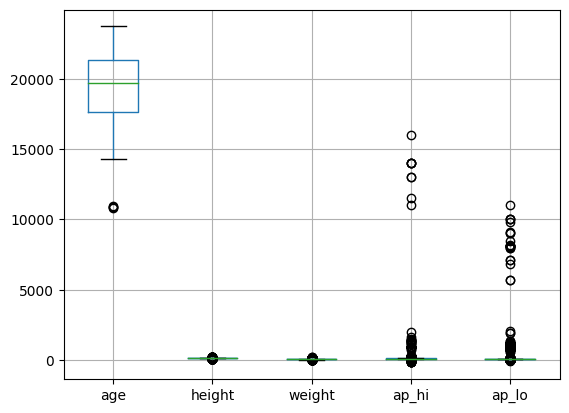

In [8]:
#plot numerical vlaues
cardio[["age","height","weight","ap_hi","ap_lo"]].boxplot()

In [9]:
#convert ages from days to years
cardio["age"]=(cardio["age"]/365).values.astype(int)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


Feature Reduction

In [10]:
#feature reduction: insted of age and height we can put BMI value
#for BMI height--> must meter and weight-->Kg

#convert height to meters
cardio["height"]=(cardio["height"]/100)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0


In [11]:
#add BMI column
cardio["bmi"]=cardio["weight"]/((cardio["height"])**2)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [12]:
cardio.drop(["id","height","weight"],axis=1,inplace=True)
cardio.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177


<Axes: >

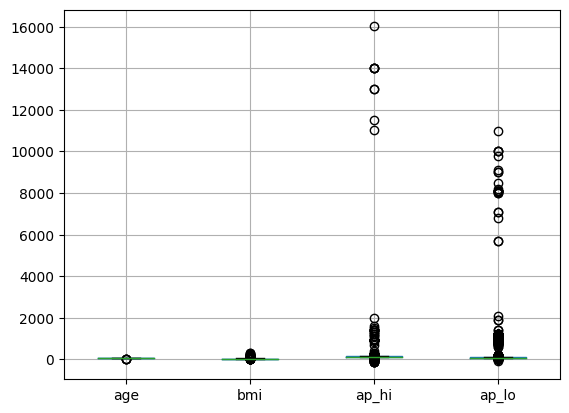

In [13]:
#plot numerical vlaues
numeric_data=cardio[["age","bmi","ap_hi","ap_lo"]]
numeric_data.boxplot()

Outlier Cleaning

In [14]:
#there are more outliers in the ap_hi ans ap_lo columns
#we have to remove outliers
#we use 1.5 IQR method to data cleaning

Q1=numeric_data.quantile(0.25)
Q3=numeric_data.quantile(0.75)

IQR=Q3-Q1
IQR

age      10.000000
bmi       6.347107
ap_hi    20.000000
ap_lo    10.000000
dtype: float64

In [15]:
((numeric_data<(Q1-1.5*IQR)) | (numeric_data>(Q3+1.5*IQR)))
#True means outliers

,age,bmi,ap_hi,ap_lo
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
...,...,...,...,...
69995,False,False,False,False
69996,False,True,False,False
69997,False,False,True,False
69998,False,False,False,False


In [16]:
#get outliers rows
out_row=((numeric_data<(Q1-1.5*IQR)) | (numeric_data>(Q3+1.5*IQR))).any(axis=1)


In [17]:
#remove outliers from original dataset
cardio=cardio[~out_row]

In [18]:
#outlier free dataframe
cardio.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
5,60,1,120,80,2,2,0,0,0,0,29.384676


<Axes: >

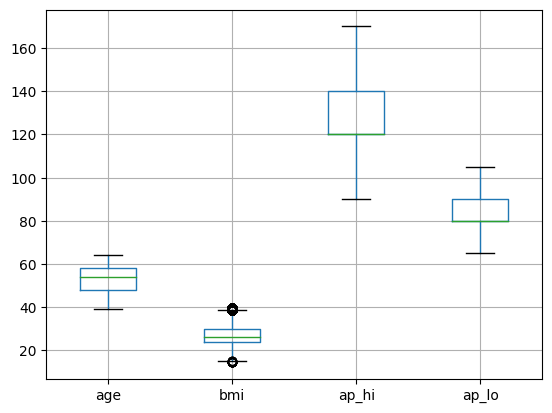

In [19]:
#plot numerical vlaues
numeric_data=cardio[["age","bmi","ap_hi","ap_lo"]]
numeric_data.boxplot()

In [20]:
cardio.shape

(62745, 11)

In [21]:
numeric_data.describe()

,age,bmi,ap_hi,ap_lo
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,27.034727,126.404319,81.689537
std,6.746333,4.406103,14.296927,7.673500
min,39.000000,14.479500,90.000000,65.000000
25%,48.000000,23.875115,120.000000,80.000000
50%,54.000000,26.222222,120.000000,80.000000
75%,58.000000,29.757585,140.000000,90.000000
max,64.000000,39.736121,170.000000,105.000000


In [22]:
#check wheater data set is balance or imbalance
cardio["cardio"].value_counts()

cardio
0    31783
1    30962
Name: count, dtype: int64

Visualization

<Axes: xlabel='cardio'>

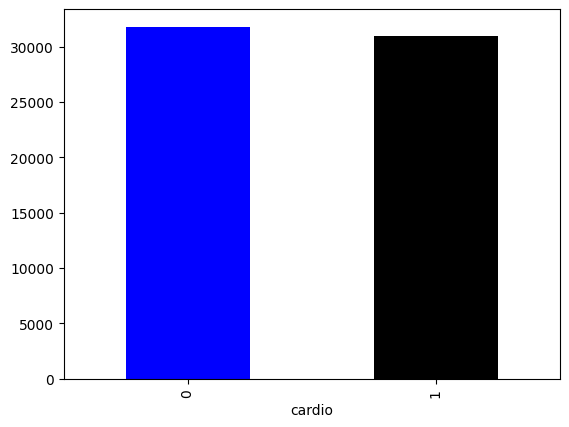

In [23]:
cardio["cardio"].value_counts().plot(kind='bar',color=['blue','black'])

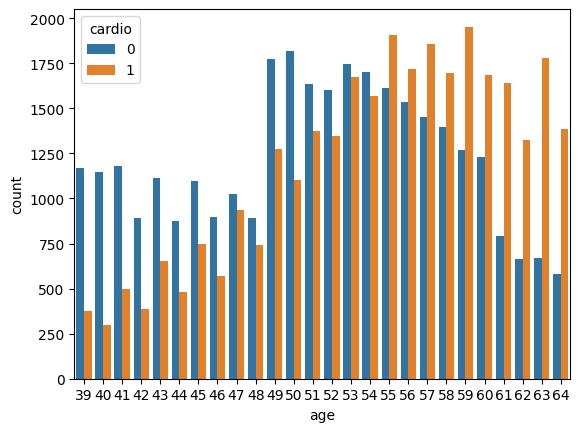

In [24]:
#plot cardio count with age
sns.countplot(data=cardio,x="age",hue="cardio")
plt.show()

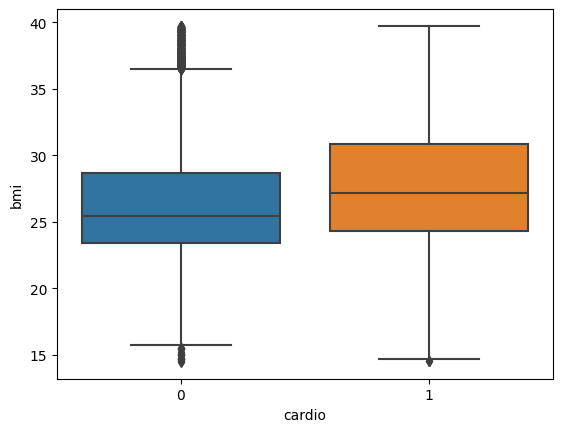

In [25]:
#get plot about bmi and cardio in cardio table

sns.boxplot(data=cardio,x="cardio",y="bmi")
plt.show()


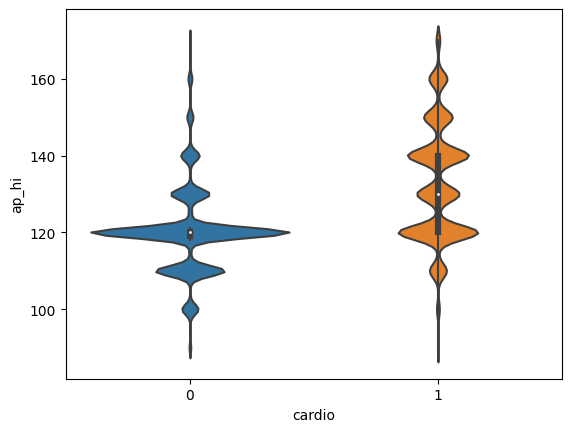

In [26]:
# plot ap_hi with cardio
sns.violinplot(data=cardio, x="cardio", y="ap_hi")
plt.show()

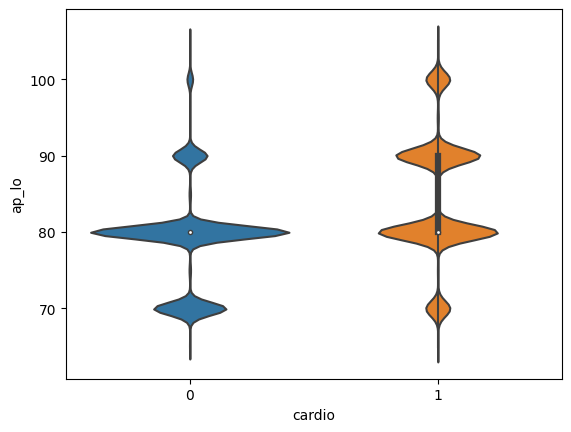

In [27]:
#plot cardio count with ap_lo
sns.violinplot(data=cardio, x="cardio", y="ap_lo")
plt.show()

In [28]:
numeric_data.head()

,age,bmi,ap_hi,ap_lo
0,50,21.967120,110,80
1,55,34.927679,140,90
2,51,23.507805,130,70
3,48,28.710479,150,100
5,60,29.384676,120,80


<Axes: >

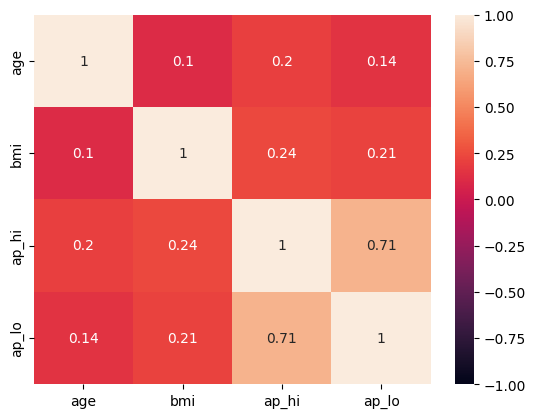

In [29]:
#check corelation
sns.heatmap(numeric_data.corr(),annot=True,vmin=-1,vmax=+1)

/tmp/ipykernel_19/2459901083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["Yes" if m==1 else "No" for m in cardio["cardio"]]


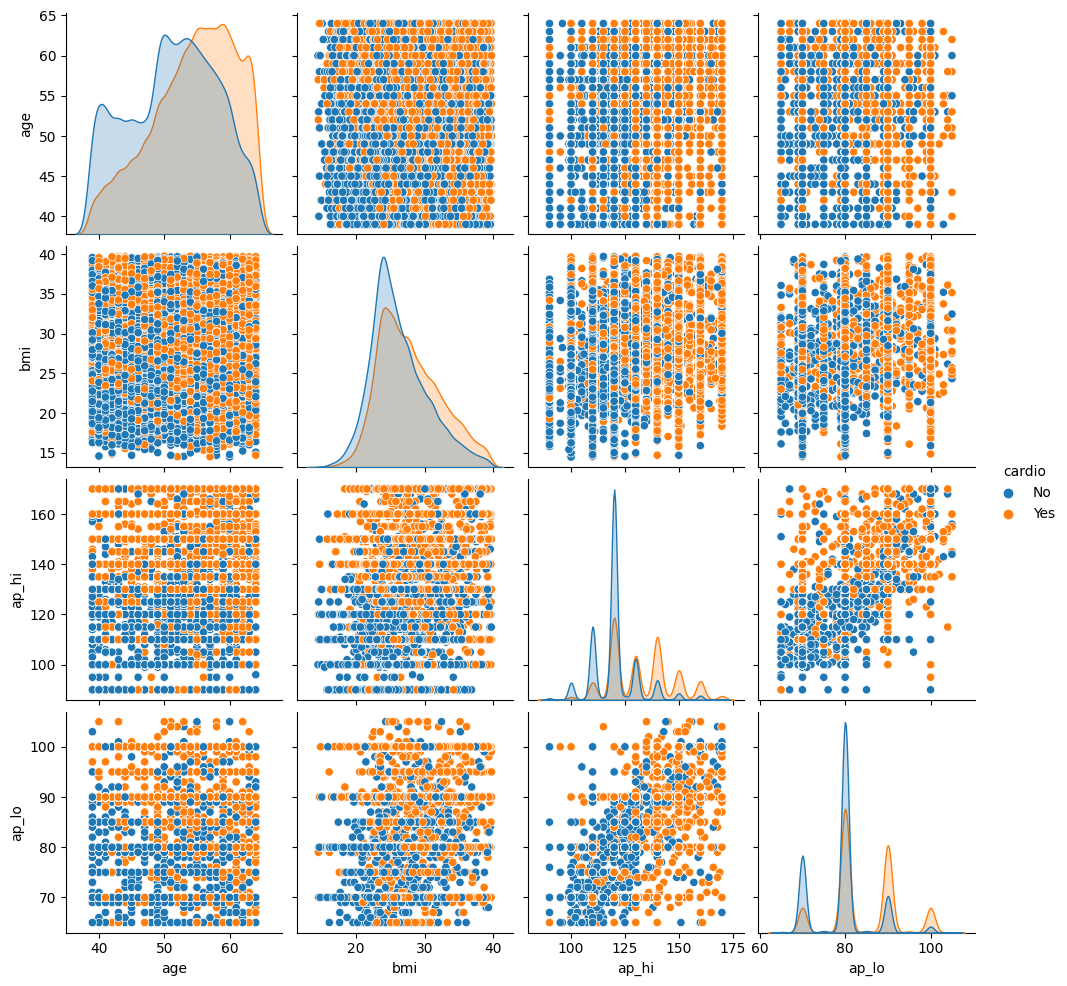

In [30]:
#plot pairplots with cardio

df=numeric_data
df["cardio"]=["Yes" if m==1 else "No" for m in cardio["cardio"]]
sns.pairplot(df,hue="cardio")
plt.show()

Reindex columns

In [31]:
cardio=cardio.reindex(columns=["age","ap_hi","ap_lo","bmi","gender","cholesterol","gluc","smoke","alco","active","cardio"])
cardio.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


data encoding

In [32]:

#only logisticRegression and KNN need dummy vsariables. others do not need
#wheather there are some numerical calculations in training process , it needs dummy variable. otherwise not
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()
cardio["gender"]=le.fit_transform(cardio["gender"])
cardio.head()

#covert male=1 and female=0

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [34]:
#one hot encodeing

#we cant dirrectly use getdummy to numerical values. labels must include as values
#therefore  we have to onehot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [35]:
#for chol

#for fit it needs 2D array. thats why reshape needs
one_hotE1=ohe.fit_transform(cardio["cholesterol"].values.reshape(len(cardio["cholesterol"]),1)).toarray()
one_hotE1=one_hotE1[:,1:].astype(int) #since there are 3 features we can remove one and conver values into integers

print(one_hotE1.shape)
#create a dataframe by including encoded arrays
df_ohot1=pd.DataFrame(one_hotE1,columns=["above normal chol","well above normal chol"])

df_ohot1.head()

(62745, 2)


,above normal chol,well above normal chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0


In [36]:
#for gluc
#for fit it needs 2D array. thats why reshape needs
one_hotE2=ohe.fit_transform(cardio["gluc"].values.reshape(len(cardio["gluc"]),1)).toarray()
one_hotE2=one_hotE2[:,1:].astype(int) #since there are 3 features we can remove one and conver values into integers

print(one_hotE2.shape)
#create a dataframe by including encoded arrays
df_ohot2=pd.DataFrame(one_hotE2,columns=["above normal gluc","well above normal gluc"])

df_ohot2.head()

(62745, 2)


,above normal gluc,well above normal gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [37]:
#Reset data index
#when we doing clearance some data rows removed. so some indexing are missing. if we concat like this there may have some misiing

cardio.reset_index(inplace=True)
cardio.drop("index",axis=1,inplace=True)
cardio.head()

,age,ap_hi,ap_lo,bmi,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [38]:
df=pd.concat([cardio.iloc[:,:10],df_ohot1,df_ohot2],axis=1)
df.drop(["cholesterol","gluc"],axis=1,inplace=True)
df.head()

,age,ap_hi,ap_lo,bmi,gender,smoke,alco,active,above normal chol,well above normal chol,above normal gluc,well above normal gluc
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


Standerize the values

In [39]:
x=df.values
y=cardio.iloc[:,8].values

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[:,:4]=sc.fit_transform(x[:,:4])
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Use voting class clasifier

In [41]:
#create model objects
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

T1=("knn",model1)
T2=("lgr",model2)
T3=("svm",model3)
T4=("rf",model4)

In [42]:
#Logistic Regression
model0=LogisticRegression()
model0.fit(x_train,y_train)
y_pred=model0.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [43]:
model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[11855,     0],
       [    0,   694]])

In [44]:
accuracy_score(y_test,y_predict)

1.0

In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11855
           1       1.00      1.00      1.00       694

    accuracy                           1.00     12549
   macro avg       1.00      1.00      1.00     12549
weighted avg       1.00      1.00      1.00     12549

